In [ ]:
import json

notebook_path = '/content/emotion_based_music_recommendation_system_project.ipynb'

cleaned_path = '/content/cleaned_notebook.ipynb'

with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = json.load(f)

if 'widgets' in nb.get('metadata', {}):
    print("Found and removing 'widgets' metadata...")
    del nb['metadata']['widgets']

with open(cleaned_path, 'w', encoding='utf-8') as f:
    json.dump(nb, f, indent=2)

print(f"Cleaned notebook saved to: {cleaned_path}")

In [ ]:


import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/fer2013.csv')
print(data.shape[0])
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}


def prepare_data(data):

    pixels = data['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
    X = np.vstack(pixels.values)
    X = X.reshape(-1, 48, 48, 1) / 255.0

    y = to_categorical(data['emotion'])
    X_train = X[data['Usage'] == 'Training']
    y_train = y[data['Usage'] == 'Training']
    X_test = X[data['Usage'] == 'PrivateTest']
    y_test = y[data['Usage'] == 'PrivateTest']
    X_val = X[data['Usage'] == 'PublicTest']
    y_val = y[data['Usage'] == 'PublicTest']

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(data)


model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                   validation_data=(X_val, y_val),
                   epochs=30,
                   callbacks=[ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2)])

# 5. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

35887


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.2132 - loss: 2.6119 - val_accuracy: 0.2371 - val_loss: 2.2302 - learning_rate: 1.0000e-04
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.2615 - loss: 1.7950 - val_accuracy: 0.3706 - val_loss: 1.6905 - learning_rate: 1.0000e-04
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.2892 - loss: 1.7509 - val_accuracy: 0.3695 - val_loss: 1.6781 - learning_rate: 1.0000e-04
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3071 - loss: 1.7164 - val_accuracy: 0.3968 - val_loss: 1.6244 - learning_rate: 1.0000e-04
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.3327 - loss: 1.6779 - val_accuracy: 0.3898 - val_loss: 1.5987 - learning_rate: 1.0000e-04
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.3403 - loss: 1.6595 - val_accuracy: 0.4065 - val_loss: 1.5615 - learning_rate: 1.0000e-04
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accurac

Mounted at /content/drive
 221030102_harshit_kishtwal.pdf
'bharatIntern (1).pdf'
 bharatIntern.pdf
 bharatIntern.png
'CC-TPFED-062024209 Front End Developer Certificate - Harshit Kishtwal.gdoc'
'CC-TPFED-062024209 Front End Developer Certificate - Harshit Kishtwal.pdf'
'class4 2025.gsheet'
'Colab Notebooks'
'Complete by 14th.pdf'
 dataVisualizationTechniques.pdf
 Document.pdf
 emotionBasedMusicRecommednadtion1.pdf
 emotionBasedMusicRecommendation2.pdf
 emotion_based_music_recommendation_system.ipynb
'EWS-ITWS  LAB MANUAL.pdf'
'F360 Campus Instructions.pdf'
'Getting started.pdf'
'harshit_kishtwal_coverLetter (1).pdf'
 harshit_kishtwal_coverLetter.gdoc
 harshit_kishtwal_resume.pdf
'IDENTITY CARD ATHENA 2024 class6.gsheet'
'IDENTITY CARD ATHENA 2024 class6.xlsx'
 IMG-20200820-WA0014.jpg
 internshipTECHPLEMENT.pdf
 LAB1.docx
 ML_and_AI.pdf
 ML_Foundation.pdf
 mockInterview1.gdoc
 Questionerre
'Questionnere imp'
'techplement_acceptance_letter (1).pdf'
 techplement_acceptance_letter.pdf
 tec

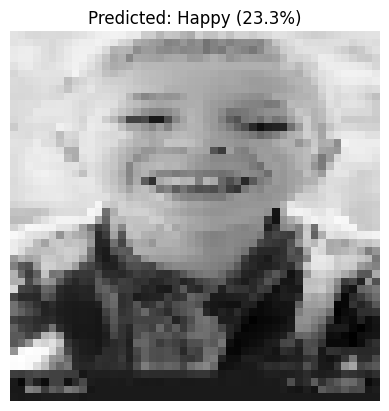

Predicted Emotion: Happy with 23.3% confidence
✅ Model saved to /content/drive/MyDrive/emotion_model.h5


In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls /content/drive/MyDrive
def predict_emotion(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img = img.reshape(1,48,48,1) / 255.0

    pred = model.predict(img)
    emotion = emotions[np.argmax(pred)]
    confidence = np.max(pred)*100

    plt.imshow(img[0,:,:,0], cmap='gray')
    plt.title(f"Predicted: {emotion} ({confidence:.1f}%)")
    plt.axis('off')
    plt.show()

    return emotion, confidence


emotion, confidence = predict_emotion('/content/happy2.jpeg')
print(f"Predicted Emotion: {emotion} with {confidence:.1f}% confidence")
model.save('/content/drive/MyDrive/emotion_model.h5')
print("Model saved to /content/drive/MyDrive/emotion_model.h5")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


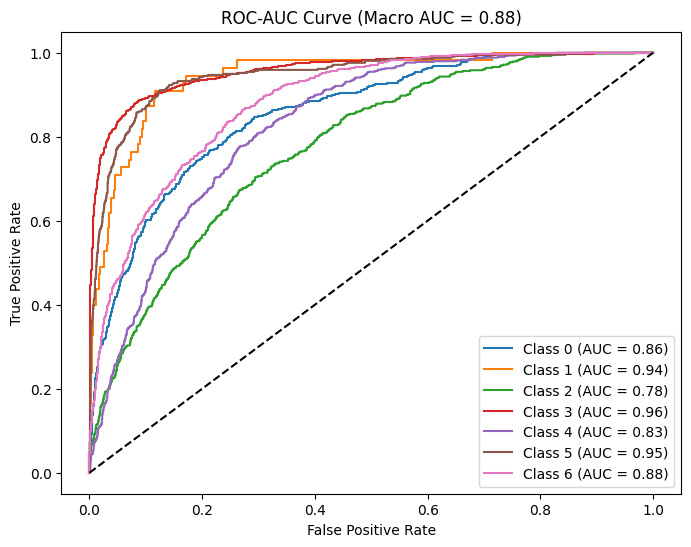

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model




y_pred_prob = model.predict(X_test)


num_classes = 7
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))


roc_auc_scores = roc_auc_score(y_test_bin, y_pred_prob, average=None)
roc_auc_macro = roc_auc_score(y_test_bin, y_pred_prob, average="macro")


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC-AUC Curve (Macro AUC = {roc_auc_macro:.2f})")
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


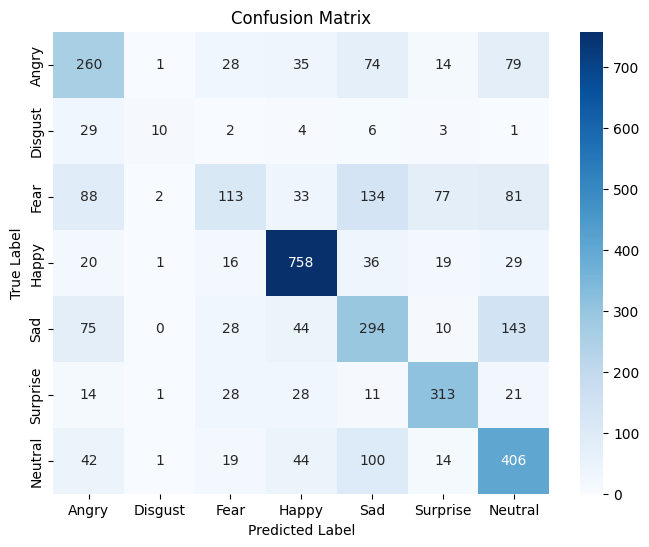

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/emotion_model.h5')

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred)


emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')


print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']))


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 60.02%
Precision: 0.5923
Recall: 0.6002
F1-Score: 0.5851

Classification Report:
              precision    recall  f1-score   support

       Angry       0.49      0.53      0.51       491
     Disgust       0.62      0.18      0.28        55
        Fear       0.48      0.21      0.30       528
       Happy       0.80      0.86      0.83       879
         Sad       0.45      0.49      0.47       594
    Surprise       0.70      0.75      0.72       416
     Neutral       0.53      0.65      0.59       626

    accuracy                           0.60      3589
   macro avg       0.58      0.53      0.53      3589
weighted avg       0.59      0.60      0.59      3589



In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/emotion_model.h5')

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

from IPython.display import HTML, display
display(HTML("""
<video id="video" width="640" height="480" autoplay muted playsinline></video>
<script>
  navigator.mediaDevices.getUserMedia({ video: true })
    .then(s => { const v = document.getElementById('video'); v.srcObject = s; v.play(); })
    .catch(e => alert('Webcam error: '+e));
</script>
"""))

from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2, numpy as np, time
from base64 import b64decode
from IPython.display import clear_output

time.sleep(2)

def get_frame():
    data = eval_js("""
      (() => {
        const v = document.getElementById('video');
        const c = document.createElement('canvas');
        c.width = v.videoWidth; c.height = v.videoHeight;
        c.getContext('2d').drawImage(v,0,0);
        return c.toDataURL('image/png');
      })();
    """)
    if not data or ',' not in data: return None
    b = b64decode(data.split(',')[1])
    arr = np.frombuffer(b, np.uint8)
    return cv2.imdecode(arr, cv2.IMREAD_COLOR) if arr.size else None

def predict_frame(f):
    gray = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    inp = cv2.resize(gray, (48,48)).reshape(1,48,48,1)/255.0
    p = model.predict(inp)
    i = np.argmax(p)
    return emotions[i], float(np.max(p)*100)

for _ in range(50):
    frame = None
    for __ in range(5):
        frame = get_frame()
        if frame is not None: break
        time.sleep(0.2)
    if frame is None:
        print("⚠️ Couldn't grab a frame; retrying")
        continue

    emo, conf = predict_frame(frame)
    label = f"{emo} ({conf:.1f}%)"
    cv2.putText(frame, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)


    clear_output(wait=True)
    cv2_imshow(frame)


    yt_url = f"https://www.youtube.com/results?search_query={emo}+songs"
    button_html = f'''
      <p><a href="{yt_url}" target="_blank">
        <button style="font-size:16px;padding:10px 20px;border-radius:5px;">
          🎵 See {emo} songs on YouTube
        </button>
      </a></p>
    '''
    display(HTML(button_html))
    break


Mounted at /content/drive


⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a frame; retrying
⚠️ Couldn't grab a f

KeyboardInterrupt: 

In [ ]:

!pip install ipywidgets

from google.colab import drive, output
drive.mount('/content/drive', force_remount=True)

import cv2, numpy as np, time
from base64 import b64decode
from tensorflow.keras.models import load_model
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow


model = load_model('/content/drive/MyDrive/emotion_model.h5')
emotions = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

display(HTML("""
<video id="video" width="320" height="240" autoplay muted playsinline style="border:1px solid #444"></video>
<script>
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream => {
    const v = document.getElementById('video');
    v.srcObject = stream;
    v.play();
  })
  .catch(e => alert('Webcam error:' + e));
</script>
"""))
time.sleep(2)

def get_frame_from_webcam():
    data = eval_js("""
    (() => {
      const v = document.getElementById('video');
      const c = document.createElement('canvas');
      c.width = v.videoWidth; c.height = v.videoHeight;
      c.getContext('2d').drawImage(v,0,0);
      return c.toDataURL('image/png');
    })();
    """)
    if not data or ',' not in data:
        return None
    b = b64decode(data.split(',')[1])
    arr = np.frombuffer(b, np.uint8)
    return cv2.imdecode(arr, cv2.IMREAD_COLOR) if arr.size else None

def predict_emotion_on_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    inp = cv2.resize(gray, (48,48)).reshape(1,48,48,1)/255.0
    p = model.predict(inp, verbose=0)
    idx = np.argmax(p)
    return emotions[idx], float(np.max(p)*100)


out = widgets.Output()
song_btn  = widgets.Button(description="🎵 Get Songs from YouTube", button_style='success', disabled=True)

last_detected_emotion = None

def on_get_songs(b):
    emo = last_detected_emotion
    if not emo:
        with out:
            print("No emotion detected yet.")
        return
    yt_url = f"https://www.youtube.com/results?search_query={emo}+songs"
    with out:
        clear_output(wait=True)
        print(f"🔗 Click to see {emo} songs on YouTube:")
        display(HTML(f'<a href="{yt_url}" target="_blank">{yt_url}</a>'))

song_btn.on_click(on_get_songs)


display(out)
display(song_btn)

detected = False
max_attempts = 30  # Limit detection to 30 tries (~15 seconds)

for _ in range(max_attempts):
    frame = get_frame_from_webcam()
    if frame is None:
        continue
    try:
        emo, conf = predict_emotion_on_frame(frame)
        if conf > 50:
            label = f"{emo} ({conf:.1f}%)"
            cv2.putText(frame, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            with out:
                clear_output(wait=True)
                cv2_imshow(frame)
                print(f" Detected: {label}")
            last_detected_emotion = emo
            song_btn.disabled = False
            detected = True
            break
    except Exception as e:
        print("Error:", e)
    time.sleep(0.5)

if not detected:
    with out:
        clear_output(wait=True)
        print("Could not detect any strong emotion.")


Mounted at /content/drive


Output()

Button(button_style='success', description='🎵 Get Songs from YouTube', disabled=True, style=ButtonStyle())

Dataset loaded with shape: (35887, 3)

Class distribution:
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

Preprocessing images...

Handling class imbalance...

Splitting data...

Loading VGG16 base model...

Building custom model head...

Starting initial training phase...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.2226 - loss: 2.3743
Epoch 1: val_accuracy improved from -inf to 0.30457, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 68s 459ms/step - accuracy: 0.2227 - loss: 2.3728 - val_accuracy: 0.3046 - val_loss: 1.7971 - learning_rate: 5.0000e-04
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.2840 - loss: 1.9382
Epoch 2: val_accuracy improved from 0.30457 to 0.36297, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 419ms/step - accuracy: 0.2840 - loss: 1.9380 - val_accuracy: 0.3630 - val_loss: 1.6946 - learning_rate: 5.0000e-04
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.3058 - loss: 1.8276
Epoch 3: val_accuracy improved from 0.36297 to 0.39221, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 426ms/step - accuracy: 0.3059 - loss: 1.8274 - val_accuracy: 0.3922 - val_loss: 1.6179 - learning_rate: 5.0000e-04
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.3252 - loss: 1.7512
Epoch 4: val_accuracy improved from 0.39221 to 0.39237, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 422ms/step - accuracy: 0.3252 - loss: 1.7511 - val_accuracy: 0.3924 - val_loss: 1.5859 - learning_rate: 5.0000e-04
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.3406 - loss: 1.7103
Epoch 5: val_accuracy improved from 0.39237 to 0.40485, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 404ms/step - accuracy: 0.3406 - loss: 1.7103 - val_accuracy: 0.4048 - val_loss: 1.5535 - learning_rate: 5.0000e-04
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.3526 - loss: 1.6706
Epoch 6: val_accuracy improved from 0.40485 to 0.41391, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 397ms/step - accuracy: 0.3526 - loss: 1.6705 - val_accuracy: 0.4139 - val_loss: 1.5274 - learning_rate: 5.0000e-04
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.3673 - loss: 1.6405
Epoch 7: val_accuracy improved from 0.41391 to 0.42511, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 413ms/step - accuracy: 0.3673 - loss: 1.6405 - val_accuracy: 0.4251 - val_loss: 1.5093 - learning_rate: 5.0000e-04
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.3692 - loss: 1.6265
Epoch 8: val_accuracy improved from 0.42511 to 0.43544, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 408ms/step - accuracy: 0.3692 - loss: 1.6265 - val_accuracy: 0.4354 - val_loss: 1.4908 - learning_rate: 5.0000e-04
Epoch 9/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.3814 - loss: 1.6043
Epoch 9: val_accuracy did not improve from 0.43544
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 397ms/step - accuracy: 0.3814 - loss: 1.6043 - val_accuracy: 0.4327 - val_loss: 1.4840 - learning_rate: 5.0000e-04
Epoch 10/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.3870 - loss: 1.5896
Epoch 10: val_accuracy improved from 0.43544 to 0.44895, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 397ms/step - accuracy: 0.3871 - loss: 1.5896 - val_accuracy: 0.4489 - val_loss: 1.4548 - learning_rate: 5.0000e-04
Epoch 11/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.3920 - loss: 1.5819
Epoch 11: val_accuracy did not improve from 0.44895
113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 406ms/step - accuracy: 0.3920 - loss: 1.5819 - val_accuracy: 0.4399 - val_loss: 1.4585 - learning_rate: 5.0000e-04
Epoch 12/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.4030 - loss: 1.5536
Epoch 12: val_accuracy improved from 0.44895 to 0.44966, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 405ms/step - accuracy: 0.4030 - loss: 1.5536 - val_accuracy: 0.4497 - val_loss: 1.4403 - learning_rate: 5.0000e-04
Epoch 13/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4032 - loss: 1.5539
Epoch 13: val_accuracy improved from 0.44966 to 0.45554, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 416ms/step - accuracy: 0.4032 - loss: 1.5539 - val_accuracy: 0.4555 - val_loss: 1.4346 - learning_rate: 5.0000e-04
Epoch 14/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.4110 - loss: 1.5388
Epoch 14: val_accuracy improved from 0.45554 to 0.46214, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 397ms/step - accuracy: 0.4110 - loss: 1.5388 - val_accuracy: 0.4621 - val_loss: 1.4150 - learning_rate: 5.0000e-04
Epoch 15/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.4184 - loss: 1.5198
Epoch 15: val_accuracy improved from 0.46214 to 0.46722, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 410ms/step - accuracy: 0.4184 - loss: 1.5199 - val_accuracy: 0.4672 - val_loss: 1.4000 - learning_rate: 5.0000e-04
Epoch 16/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.4165 - loss: 1.5226
Epoch 16: val_accuracy did not improve from 0.46722
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 400ms/step - accuracy: 0.4165 - loss: 1.5226 - val_accuracy: 0.4670 - val_loss: 1.3918 - learning_rate: 5.0000e-04
Epoch 17/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.4179 - loss: 1.5118
Epoch 17: val_accuracy improved from 0.46722 to 0.47255, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 414ms/step - accuracy: 0.4180 - loss: 1.5118 - val_accuracy: 0.4725 - val_loss: 1.3870 - learning_rate: 5.0000e-04
Epoch 18/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.4224 - loss: 1.5006
Epoch 18: val_accuracy did not improve from 0.47255
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 413ms/step - accuracy: 0.4224 - loss: 1.5006 - val_accuracy: 0.4696 - val_loss: 1.3889 - learning_rate: 5.0000e-04
Epoch 19/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4307 - loss: 1.4929
Epoch 19: val_accuracy did not improve from 0.47255
113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 408ms/step - accuracy: 0.4307 - loss: 1.4929 - val_accuracy: 0.4683 - val_loss: 1.3835 - learning_rate: 5.0000e-04
Epoch 20/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4351 - loss: 1.4800
Epoch 20: val_accuracy improved from 0.47255 to 0.47453, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 412ms/step - accuracy: 0.4351 - loss: 1.4801 - val_accuracy: 0.4745 - val_loss: 1.3714 - learning_rate: 5.0000e-04
Epoch 21/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.4280 - loss: 1.4874
Epoch 21: val_accuracy improved from 0.47453 to 0.48216, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 407ms/step - accuracy: 0.4280 - loss: 1.4874 - val_accuracy: 0.4822 - val_loss: 1.3672 - learning_rate: 5.0000e-04
Epoch 22/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4343 - loss: 1.4752
Epoch 22: val_accuracy improved from 0.48216 to 0.48486, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 406ms/step - accuracy: 0.4343 - loss: 1.4752 - val_accuracy: 0.4849 - val_loss: 1.3581 - learning_rate: 5.0000e-04
Epoch 23/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.4378 - loss: 1.4685
Epoch 23: val_accuracy did not improve from 0.48486
113/113 ━━━━━━━━━━━━━━━━━━━━ 83s 412ms/step - accuracy: 0.4378 - loss: 1.4685 - val_accuracy: 0.4787 - val_loss: 1.3605 - learning_rate: 5.0000e-04
Epoch 24/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4382 - loss: 1.4620
Epoch 24: val_accuracy did not improve from 0.48486
113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 403ms/step - accuracy: 0.4382 - loss: 1.4621 - val_accuracy: 0.4821 - val_loss: 1.3406 - learning_rate: 5.0000e-04
Epoch 25/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4421 - loss: 1.4548
Epoch 25: val_accuracy improved from 0.48486 to 0.49162, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 412ms/step - accuracy: 0.4421 - loss: 1.4548 - val_accuracy: 0.4916 - val_loss: 1.3333 - learning_rate: 5.0000e-04
Epoch 26/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.4409 - loss: 1.4544
Epoch 26: val_accuracy did not improve from 0.49162
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 412ms/step - accuracy: 0.4409 - loss: 1.4543 - val_accuracy: 0.4909 - val_loss: 1.3387 - learning_rate: 5.0000e-04
Epoch 27/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.4443 - loss: 1.4462
Epoch 27: val_accuracy improved from 0.49162 to 0.49861, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 404ms/step - accuracy: 0.4443 - loss: 1.4462 - val_accuracy: 0.4986 - val_loss: 1.3164 - learning_rate: 5.0000e-04
Epoch 28/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.4489 - loss: 1.4364
Epoch 28: val_accuracy did not improve from 0.49861
113/113 ━━━━━━━━━━━━━━━━━━━━ 46s 405ms/step - accuracy: 0.4489 - loss: 1.4365 - val_accuracy: 0.4928 - val_loss: 1.3220 - learning_rate: 5.0000e-04
Epoch 29/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.4537 - loss: 1.4283
Epoch 29: val_accuracy improved from 0.49861 to 0.49980, saving model to best_model.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 415ms/step - accuracy: 0.4537 - loss: 1.4283 - val_accuracy: 0.4998 - val_loss: 1.3140 - learning_rate: 5.0000e-04
Epoch 30/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.4557 - loss: 1.4205
Epoch 30: val_accuracy did not improve from 0.49980
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 415ms/step - accuracy: 0.4557 - loss: 1.4206 - val_accuracy: 0.4963 - val_loss: 1.3110 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 30.

Starting fine-tuning phase...
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - accuracy: 0.4617 - loss: 1.4094 - val_accuracy: 0.5189 - val_loss: 1.2609 - learning_rate: 1.0000e-05
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 426ms/step - accuracy: 0.4803 - loss: 1.3649 - val_accuracy: 0.5360 - val_loss: 1.2292 - learning_rate: 1.0000e-05
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 49s 436ms/step - accuracy: 0.4895 - loss: 1.3352 - val_accuracy: 0.5413 - val_loss: 1.2062 - learning_rate: 1.0000

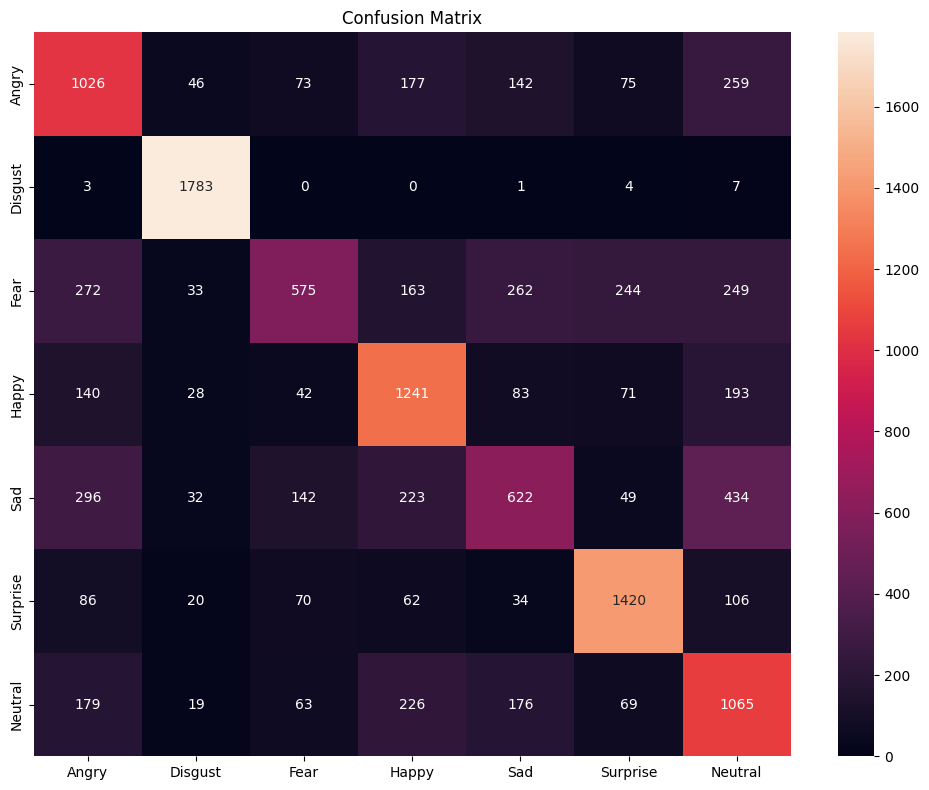

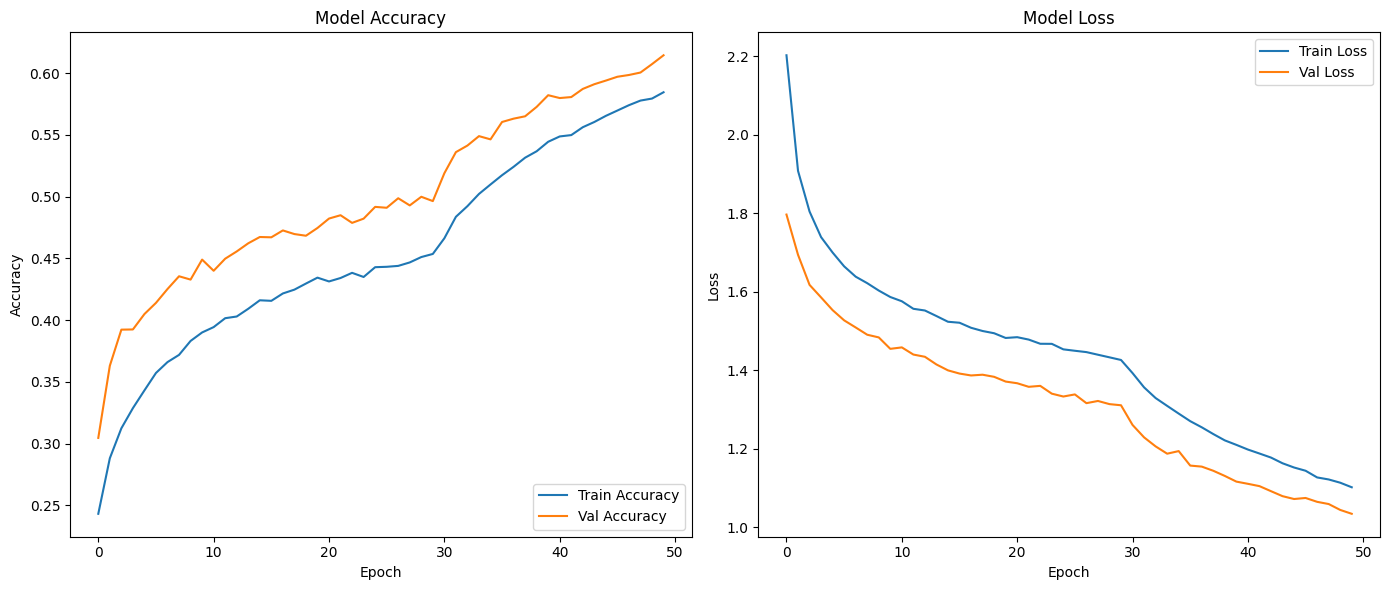

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, CSVLogger
from imblearn.over_sampling import RandomOverSampler


df = pd.read_csv('/content/fer2013.zip')
print("Dataset loaded with shape:", df.shape)


print("\nClass distribution:")
print(df['emotion'].value_counts())


def preprocess_pixels(pixel_str):
    pixels = np.array(pixel_str.split(), dtype="float32")
    pixels = pixels.reshape(48, 48) / 255.0  # Normalize to [0,1]

    return np.stack((pixels,)*3, axis=-1)

print("\nPreprocessing images...")
pixels = df['pixels'].apply(preprocess_pixels)
X = np.array(pixels.tolist())
y = to_categorical(df['emotion'])


print("\nHandling class imbalance...")
ros = RandomOverSampler(random_state=42)
X_reshaped = X.reshape(X.shape[0], -1)
X_resampled, y_resampled = ros.fit_resample(X_reshaped, df['emotion'])
X_resampled = X_resampled.reshape(-1, 48, 48, 3)
y_resampled = to_categorical(y_resampled)


print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)


train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()


print("\nLoading VGG16 base model...")
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(48, 48, 3)
)


base_model.trainable = False

# Add custom head
print("\nBuilding custom model head...")
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

csv_logger = CSVLogger('training_log.csv')


print("\nStarting initial training phase...")
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=449),
    epochs=30,
    validation_data=test_datagen.flow(X_test, y_test, batch_size=449),
    callbacks=[reduce_lr, early_stop, checkpoint, csv_logger],
    verbose=1
)


print("\nStarting fine-tuning phase...")
base_model.trainable = True
for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=449),
    epochs=20,
    validation_data=test_datagen.flow(X_test, y_test, batch_size=449),
    callbacks=[reduce_lr, early_stop, csv_logger],
    verbose=1
)


print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=449)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

y_pred = model.predict(X_test, batch_size=449)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")


emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=emotion_labels.values()))


plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True, fmt='d',
            xticklabels=emotion_labels.values(),
            yticklabels=emotion_labels.values())
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:

# Now the ROC curve code will work:
num_classes = 7
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
                  4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Binarize the true labels
y_test_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Compute ROC-AUC
roc_auc_scores = roc_auc_score(y_test_bin, y_pred_prob, average=None)
roc_auc_macro = roc_auc_score(y_test_bin, y_pred_prob, average="macro")

# Plot ROC Curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{emotion_labels[i]} (AUC = {roc_auc_scores[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves (Macro AUC = {roc_auc_macro:.2f})')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

NameError: name 'y_true' is not defined

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('fer2013.csv')
pixels = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
X = np.array(pixels.tolist()).reshape(-1, 48, 48, 1)
X = np.repeat(X, 3, axis=-1)
y = to_categorical(df['emotion'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from google.colab import drive
import time

# 1. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test)
)

drive.mount('/content/drive')

timestamp = time.strftime("%Y%m%d_%H%M%S")
save_path = f"/content/drive/MyDrive/emotion_model_vgg16_{timestamp}.h5"

save_model(model, save_path)
print(f"Model saved to: {save_path}")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.2725 - loss: 5.6994 - val_accuracy: 0.3285 - val_loss: 2.2735
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.3385 - loss: 1.9626 - val_accuracy: 0.3559 - val_loss: 1.7686
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.3767 - loss: 1.6455 - val_accuracy: 0.3848 - val_loss: 1.6553
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.3943 - loss: 1.5886 - val_accuracy: 0.3940 - val_loss: 1.6086
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.3969 - loss: 1.5610 - val_accuracy: 0.3838 - val_loss: 1.6356
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.4057 - loss: 1.5392 - val_accuracy: 0.3926 - val_loss: 1.6088
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.4108 - loss: 1.5257 - val_accuracy: 0.3958 - val_loss: 1.5930
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.4173 - loss: 1.5155 - val_accurac

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to: /content/drive/MyDrive/emotion_model_vgg16_20250430_180705.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3966 - loss: 1.6351

Test Accuracy: 40.18%
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
ROC-AUC Score: 0.7478

Classification Report:
              precision    recall  f1-score   support

       Angry       0.31      0.27      0.29      1000
     Disgust       0.40      0.11      0.18       105
        Fear       0.36      0.24      0.29      1052
       Happy       0.55      0.51      0.53      1782
         Sad       0.37      0.31      0.34      1251
    Surprise       0.50      0.50      0.50       771
     Neutral       0.31      0.55      0.40      1217

    accuracy                           0.40      7178
   macro avg       0.40      0.36      0.36      7178
weighted avg       0.41      0.40      0.40      7178



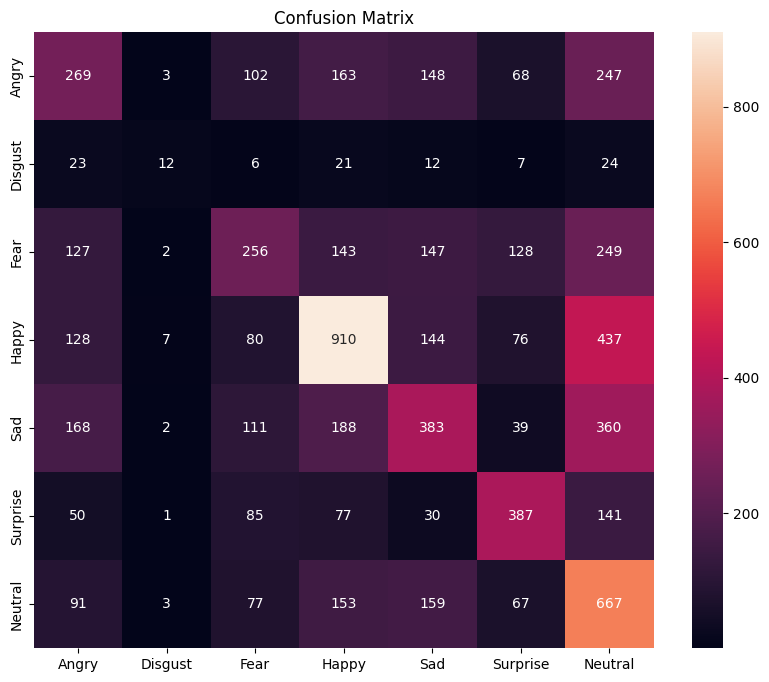

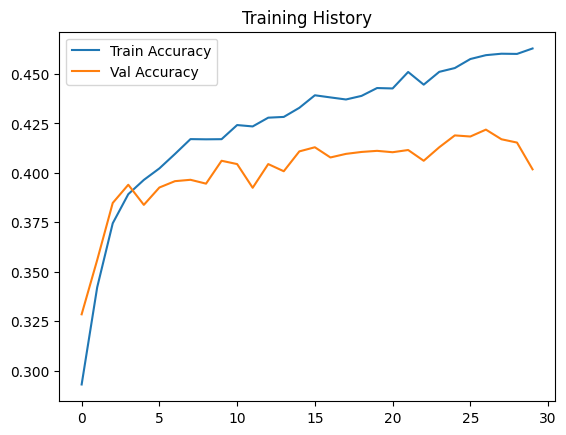

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=emotions.values()))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True, fmt='d',
            xticklabels=emotions.values(),
            yticklabels=emotions.values())
plt.title('Confusion Matrix')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#Clsutering and Recommendations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('/content/genres.csv')
len(df)


<ipython-input-22-95d64ecc4115>:15: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/genres.csv')


42305

In [ ]:
df[df['song_name'].isnull()].shape

(20786, 22)

In [ ]:
# Remove rows where 'song_name' or 'uri' are null or empty
df = df.dropna(subset=['song_name', 'uri'])
df['song_name'] = df['song_name'].str.strip()
df = df[df['song_name'] != '']

# Drop duplicates
df = df.drop_duplicates(subset=['song_name', 'uri'])

final_row_count = len(df)

print("Count of final rows:", final_row_count)
print("Rows with empty song names:", df[df['song_name'].isnull() | df['song_name'] == ''])


Count of final rows: 18352
Rows with empty song names: Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, genre, song_name, Unnamed: 0, title]
Index: []

[0 rows x 22 columns]


<ipython-input-3-80b5e9e48e6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['song_name'] = df['song_name'].str.strip()


<ipython-input-4-58dcccce020d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')


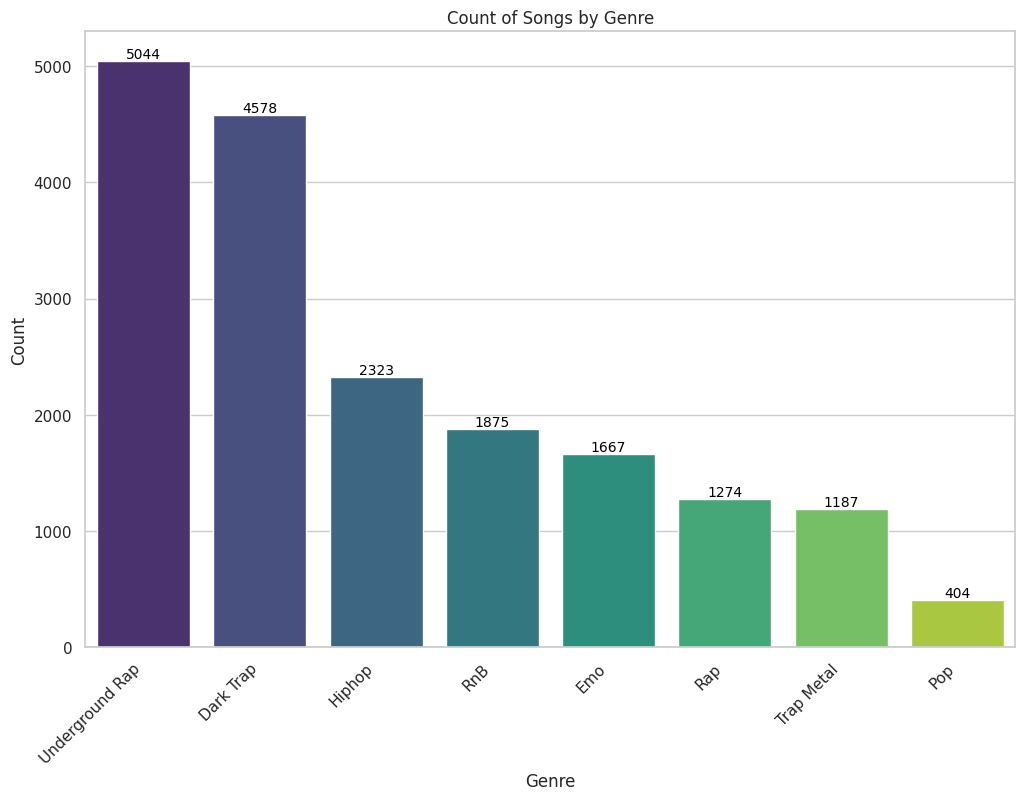

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a count plot with count labels using sns.countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()


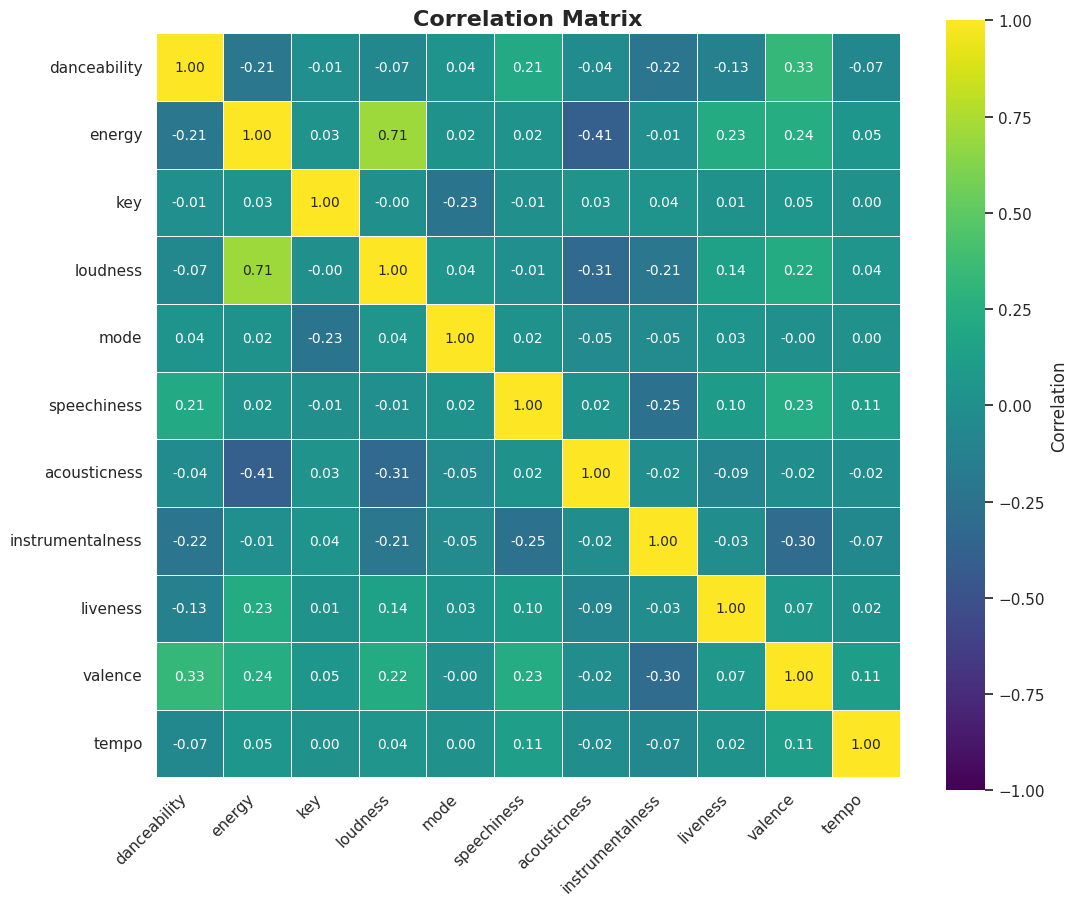

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

sns.set(style="whitegrid")

numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

colors = sns.color_palette('viridis')

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df


<ipython-input-6-f8591e928cb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


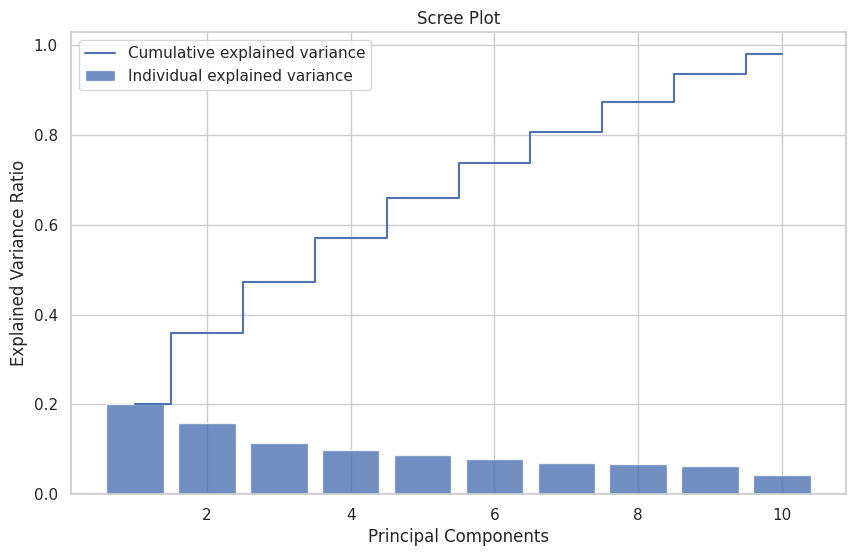

In [ ]:
# PCA
n_components = 10
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


In [ ]:
n_components = 4
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[ 0.74729341,  1.23863762, -1.23011329, -0.19451128],
       [-1.5678939 , -0.0729223 , -0.32552114, -0.87823353],
       [ 1.44584131, -0.74249617, -0.74215366,  1.01669114],
       ...,
       [-0.44862149,  0.23462046, -0.07725616,  0.91485627],
       [ 0.58530391,  1.08221556, -0.21588203,  0.10470561],
       [ 1.18116072,  0.88273037,  0.73865583,  0.21430425]])

<ipython-input-9-71453cb0d469>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)


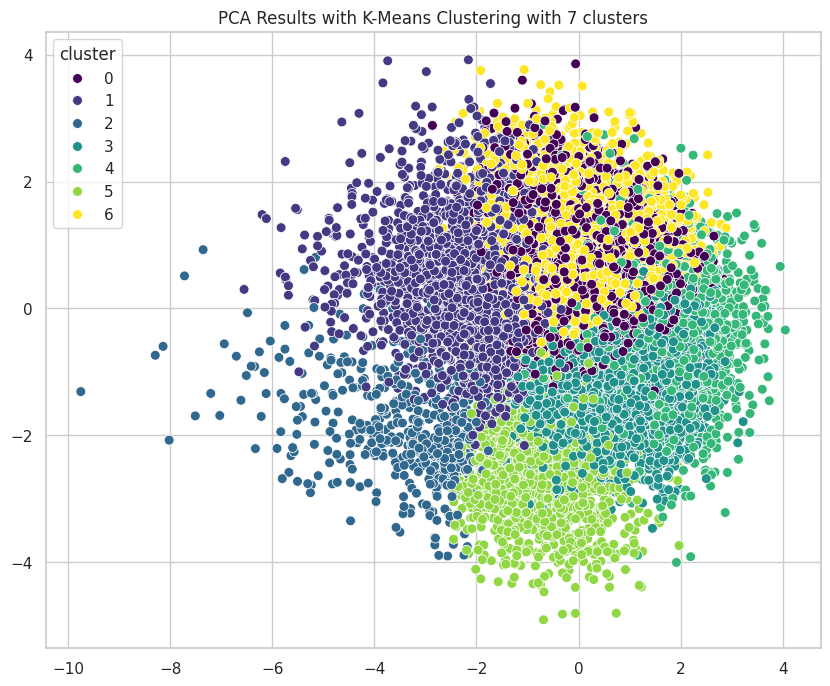

In [ ]:
n_clusters = 7 # Number of clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [ ]:
filtered_df_pca
filtered_df_pca['cluster'].value_counts()

,count
cluster,
6,4958
0,4309
3,3386
1,2327
4,1677
5,1164
2,531


In [ ]:

cluster_to_emotion = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Sad',
    4: 'Happy',
    5: 'Surprise',
    6: 'Neutral'
}


filtered_df_pca['mood'] = filtered_df_pca['cluster'].map(cluster_to_emotion)
filtered_df_pca

<ipython-input-11-a4ce8ada4ae1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['mood'] = filtered_df_pca['cluster'].map(cluster_to_emotion)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,6,Neutral
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1,Disgust
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3,Sad
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3,Sad
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,6,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",4,Happy
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,6,Neutral
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,6,Neutral
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,6,Neutral


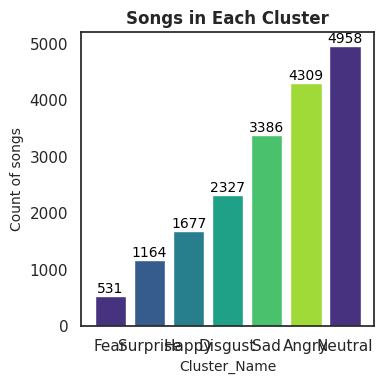

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="white")


cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()


colors = sns.color_palette('viridis')


plt.figure(figsize=(4, 4))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.title('Songs in Each Cluster', fontsize=12, fontweight='bold')
plt.xlabel('Cluster_Name', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

In [ ]:

!pip install ipywidgets

from google.colab import drive, output
drive.mount('/content/drive', force_remount=True)

import cv2, numpy as np, time
from base64 import b64decode
from tensorflow.keras.models import load_model
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
finalLabel = "happy"

model = load_model('/content/drive/MyDrive/emotion_model.h5')
emotions = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

display(HTML("""
<video id="video" width="320" height="240" autoplay muted playsinline style="border:1px solid #444"></video>
<script>
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream => {
    const v = document.getElementById('video');
    v.srcObject = stream;
    v.play();
  })
  .catch(e => alert('Webcam error:' + e));
</script>
"""))
time.sleep(2)

def get_frame_from_webcam():
    data = eval_js("""
    (() => {
      const v = document.getElementById('video');
      const c = document.createElement('canvas');
      c.width = v.videoWidth; c.height = v.videoHeight;
      c.getContext('2d').drawImage(v,0,0);
      return c.toDataURL('image/png');
    })();
    """)
    if not data or ',' not in data:
        return None
    b = b64decode(data.split(',')[1])
    arr = np.frombuffer(b, np.uint8)
    return cv2.imdecode(arr, cv2.IMREAD_COLOR) if arr.size else None

def predict_emotion_on_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    inp = cv2.resize(gray, (48,48)).reshape(1,48,48,1)/255.0
    p = model.predict(inp, verbose=0)
    idx = np.argmax(p)
    return emotions[idx], float(np.max(p)*100)


out = widgets.Output()
song_btn  = widgets.Button(description="🎵 Get Songs from YouTube", button_style='success', disabled=True)

last_detected_emotion = None

def on_get_songs(b):
    emo = last_detected_emotion
    if not emo:
        with out:
            print("No emotion detected yet.")
        return
    yt_url = f"https://www.youtube.com/results?search_query={emo}+songs"
    with out:
        clear_output(wait=True)
        print(f"🔗 Click to see {emo} songs on YouTube:")
        display(HTML(f'<a href="{yt_url}" target="_blank">{yt_url}</a>'))

song_btn.on_click(on_get_songs)


display(out)
display(song_btn)

detected = False
max_attempts = 30  # Limit detection to 30 tries (~15 seconds)


for _ in range(max_attempts):
    frame = get_frame_from_webcam()
    if frame is None:
        continue
    try:
        emo, conf = predict_emotion_on_frame(frame)
        if conf > 50:
            label = f"{emo} ({conf:.1f}%)"
            cv2.putText(frame, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            with out:
                clear_output(wait=True)
                cv2_imshow(frame)
                finalLabel = label
                print(f" Detected: {label}")
            last_detected_emotion = emo
            song_btn.disabled = False
            detected = True
            break
    except Exception as e:
        print("Error:", e)
    time.sleep(0.5)

if not detected:
    with out:
        clear_output(wait=True)
        print("Could not detect any strong emotion.")






Mounted at /content/drive


Output()

Button(button_style='success', description='🎵 Get Songs from YouTube', disabled=True, style=ButtonStyle())

In [ ]:
print("Original emotion label:", finalLabel)

finalLabel = ''.join([c for c in finalLabel if c.isalpha()])
print("Cleaned emotion label:", finalLabel)

filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'].str.lower() == finalLabel.lower()]


try:
    if len(filtered_by_mood) >= 3:
        random_songs = filtered_by_mood.sample(3)[['song_name']].dropna()
    else:
        print(f"Warning: Only found {len(filtered_by_mood)} songs. Showing all available.")
        random_songs = filtered_by_mood[['song_name']].dropna()

    print("\nDetected mood is:", finalLabel)
    print("Recommended songs:")

    for index, row in random_songs.iterrows():
        full_song_name = str(row['song_name']).strip()
        # Proper YouTube search URL encoding
        yt_query = full_song_name.replace(" ", "+") + "+song"
        yt_url = f"https://www.youtube.com/results?search_query={yt_query}"

        print(f"\n🎵 {full_song_name}")
        print(f"🔗 YouTube: {yt_url}")

except Exception as e:
    print("Error generating recommendations:", e)
    print("Showing random songs as fallback")
    fallback_songs = filtered_df_pca[['song_name']].dropna().sample(3)
    for index, row in fallback_songs.iterrows():
        full_song_name = str(row['song_name']).strip()
        yt_query = full_song_name.replace(" ", "+") + "+song"
        yt_url = f"https://www.youtube.com/results?search_query={yt_query}"
        print(f"\n🎵 {full_song_name}")
        print(f"🔗 YouTube: {yt_url}")

Original emotion label: Happy
Cleaned emotion label: Happy

Detected mood is: Happy
Recommended songs:

🎵 F T F T
🔗 YouTube: https://www.youtube.com/results?search_query=F+T+F+T+song

🎵 Midnight
🔗 YouTube: https://www.youtube.com/results?search_query=Midnight+song

🎵 ꞌCosmicꞌ.m4a
🔗 YouTube: https://www.youtube.com/results?search_query=ꞌCosmicꞌ.m4a+song
